In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
data_original = pd.read_excel('titanic.xls')
data_original

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


* Data Processing

In [ ]:
data_original = data_original.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
data_original.fillna(data_original.mean(), inplace=True)
data_original.dropna(inplace=True)

mapper1 = {'female': 0, 'male': 1}
mapper2 = {'S': 0, 'C': 1, 'Q': 2}
data_original['sex'] = data_original['sex'].map(mapper1)
data_original['embarked'] = data_original['embarked'].map(mapper2)

print(data_original.isna().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


<ipython-input-4-8f1a9c6c1588>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_original.fillna(data_original.mean(), inplace=True)


* EDA

In [ ]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   sex       1307 non-null   int64  
 3   age       1307 non-null   float64
 4   sibsp     1307 non-null   int64  
 5   parch     1307 non-null   int64  
 6   fare      1307 non-null   float64
 7   embarked  1307 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 91.9 KB


In [ ]:
data_original.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.381025,0.644989,29.850348,0.499617,0.385616,33.224011,0.394797
std,0.836942,0.485825,0.478700,12.860391,1.042273,0.866092,51.746164,0.653817
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,1.000000,29.881135,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [ ]:
df = data_original.to_numpy()
df

array([[  1.    ,   1.    ,   0.    , ...,   0.    , 211.3375,   0.    ],
       [  1.    ,   1.    ,   1.    , ...,   2.    , 151.55  ,   0.    ],
       [  1.    ,   0.    ,   0.    , ...,   2.    , 151.55  ,   0.    ],
       ...,
       [  3.    ,   0.    ,   1.    , ...,   0.    ,   7.225 ,   1.    ],
       [  3.    ,   0.    ,   1.    , ...,   0.    ,   7.225 ,   1.    ],
       [  3.    ,   0.    ,   1.    , ...,   0.    ,   7.875 ,   0.    ]])

* Kmeans Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

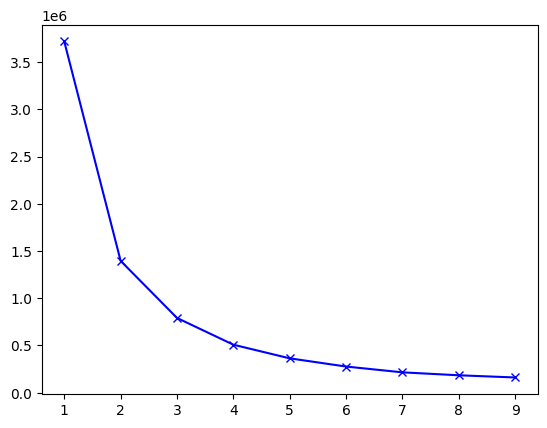

In [ ]:
sum_distances = []
K = range(1, 10)
for k in K:
  k_mean = KMeans(n_clusters = k)
  k_mean.fit(df)
  sum_distances.append(k_mean.inertia_)

plt.plot(K, sum_distances, 'bx-')
plt.show()

In [ ]:
k_mean_5 = KMeans(n_clusters = 5)
model = k_mean_5.fit(data_original)
kmean_5 = k_mean_5.labels_

data_original['clusters'] = kmean_5
print(data_original.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   pclass  survived  sex      age  sibsp  parch      fare  embarked  clusters
0       1         1    0  29.0000      0      0  211.3375         0         1
1       1         1    1   0.9167      1      2  151.5500         0         4
2       1         0    0   2.0000      1      2  151.5500         0         4
3       1         0    1  30.0000      1      2  151.5500         0         4
4       1         0    0  25.0000      1      2  151.5500         0         4


In [ ]:
silhouette_score = metrics.silhouette_score(df, kmean_5, metric='euclidean')
print("Silhouette Score: {:.3f}".format(silhouette_score))

calinski_harabasz_score = metrics.calinski_harabasz_score(df, kmean_5)
print("Calinski Harabasz Score: {:.3f}".format(calinski_harabasz_score))


Silhouette Score: 0.622
Calinski Harabasz Score: 3001.358


In [ ]:
data_original.embarked.value_counts().sort_index()

0    914
1    270
2    123
Name: embarked, dtype: int64

In [ ]:
data_original.pclass.value_counts().sort_index()

1    321
2    277
3    709
Name: pclass, dtype: int64

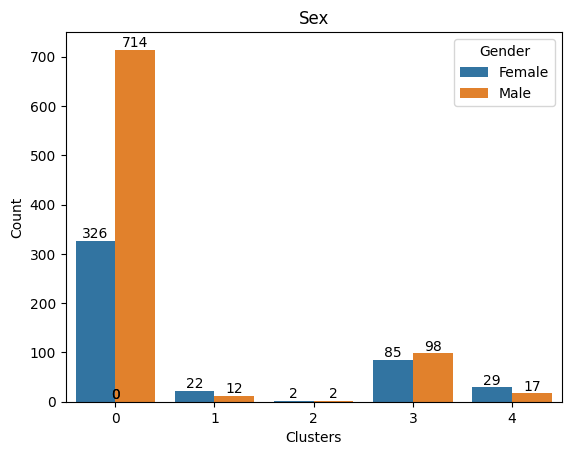

In [ ]:
ax = sns.countplot(x='clusters', hue='sex', data=data_original)

plt.title('Sex')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [ ]:
cluster_counts = data_original['clusters'].value_counts().sort_index()

total_samples = cluster_counts.sum()
cluster_distribution = pd.DataFrame({'count': cluster_counts, 'percentage': ((cluster_counts / total_samples) * 100).round(2).astype(str) + '%' })

print(cluster_distribution)

   count percentage
0   1040     79.57%
1     34       2.6%
2      4      0.31%
3    183      14.0%
4     46      3.52%


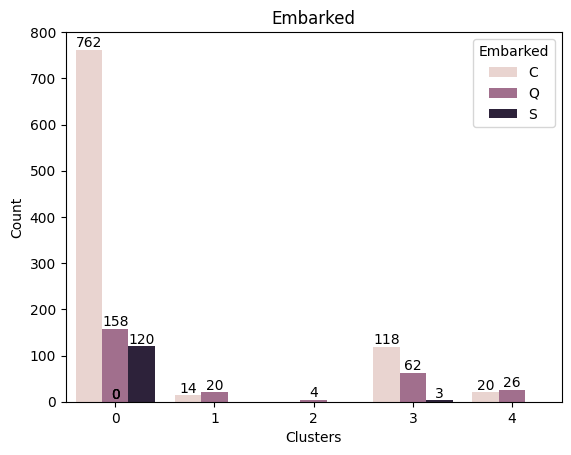

In [ ]:
ax = sns.countplot(x='clusters', hue='embarked', data=data_original)

plt.title('Embarked')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='Embarked', loc='upper right', labels=['C', 'Q', 'S'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

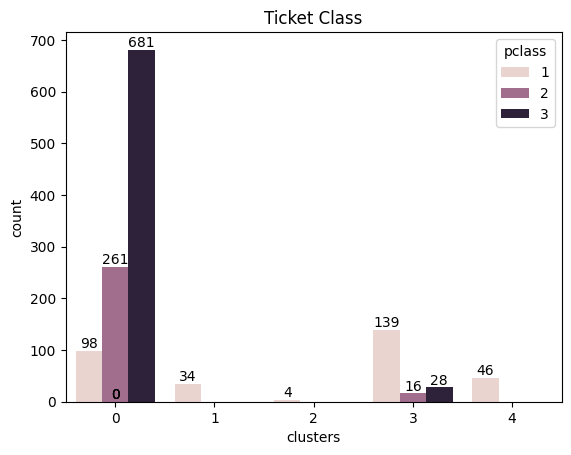

In [ ]:
ax = sns.countplot(data=data_original, x='clusters', hue='pclass')

ax.set_title('Ticket Class')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

Text(0.5, 1.0, 'Number of Siblings/Close Family')

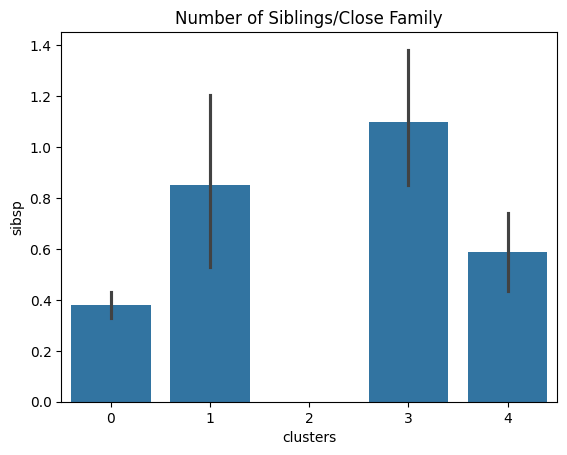

In [ ]:
sns.barplot(x=data_original.clusters, y=data_original.sibsp).set_title('Number of Siblings/Close Family')

Text(0.5, 1.0, 'Number of Parents/Children')

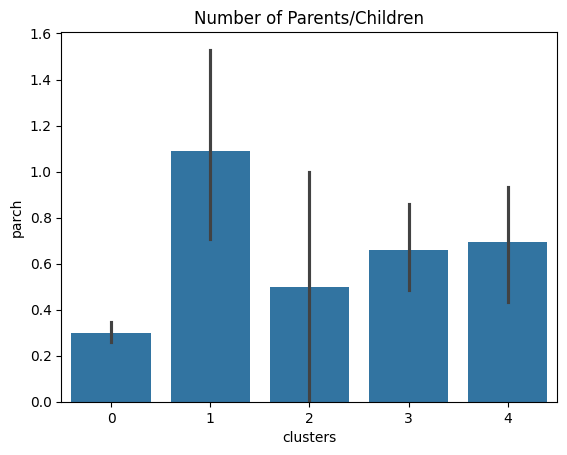

In [ ]:
sns.barplot(x=data_original.clusters, y=data_original.parch).set_title('Number of Parents/Children')


<ipython-input-19-4b260616a9ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_original['clusters'], palette='Set3', y=data_original['fare'])


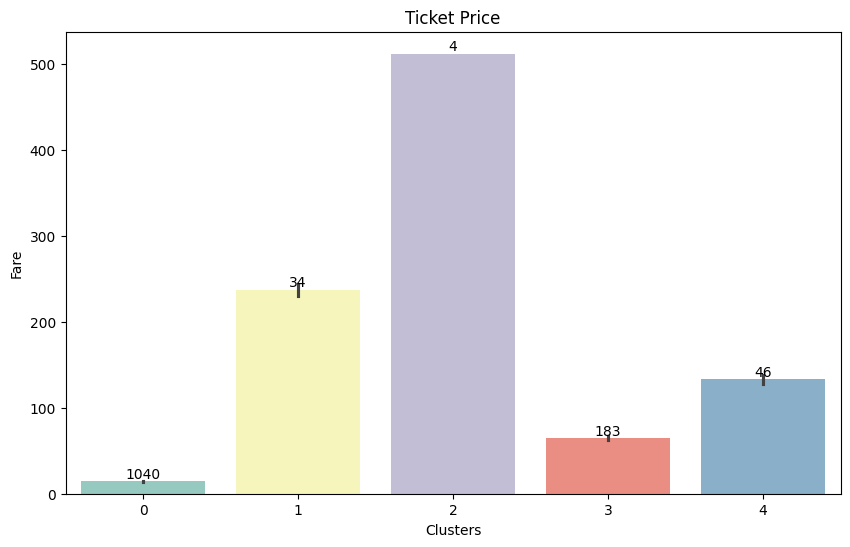

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=data_original['clusters'], palette='Set3', y=data_original['fare'])

for p, count in zip(ax.patches, cluster_counts):
    height = p.get_height()
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10,
                color='black')


plt.title('Ticket Price')
plt.xlabel('Clusters')
plt.ylabel('Fare')
plt.show()

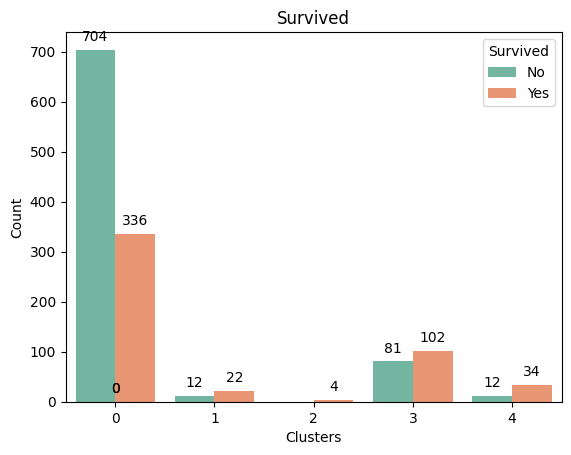

In [ ]:
ax = sns.countplot(x='clusters', hue='survived', data=data_original, palette='Set2')

ax.set_title('Survived')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()


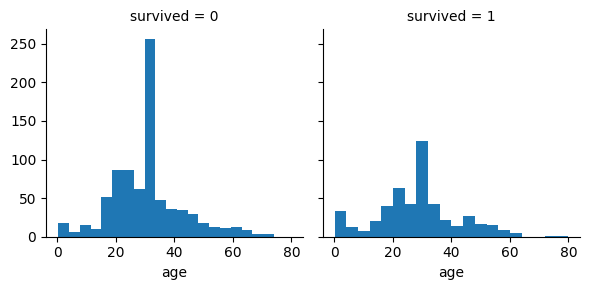

In [ ]:
g = sns.FacetGrid(data_original, col='survived')
g.map(plt.hist, 'age', bins=20)

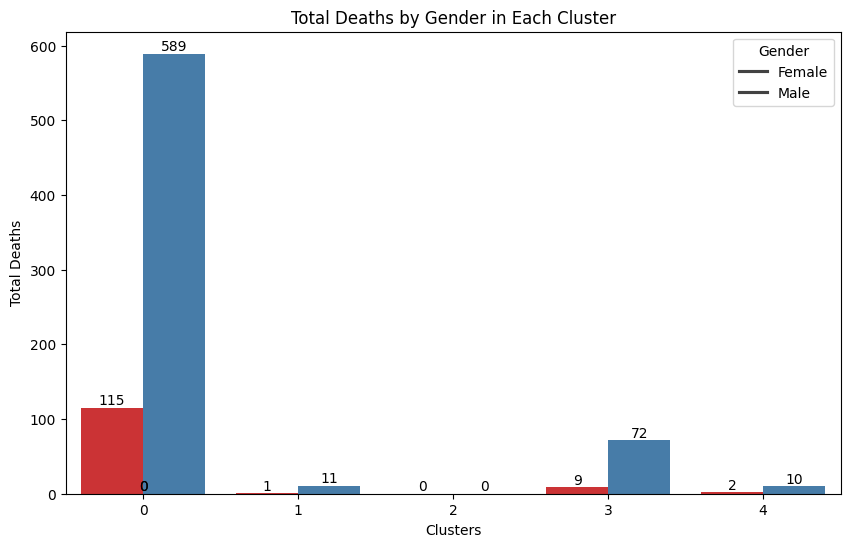

In [ ]:
death_count = data_original.groupby(['clusters', 'sex'])['survived'].apply(lambda x: (x == 0).sum()).reset_index(name='death_count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='clusters', y='death_count', hue='sex', data=death_count, palette='Set1')

plt.title('Total Deaths by Gender in Each Cluster')
plt.xlabel('Clusters')
plt.ylabel('Total Deaths')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

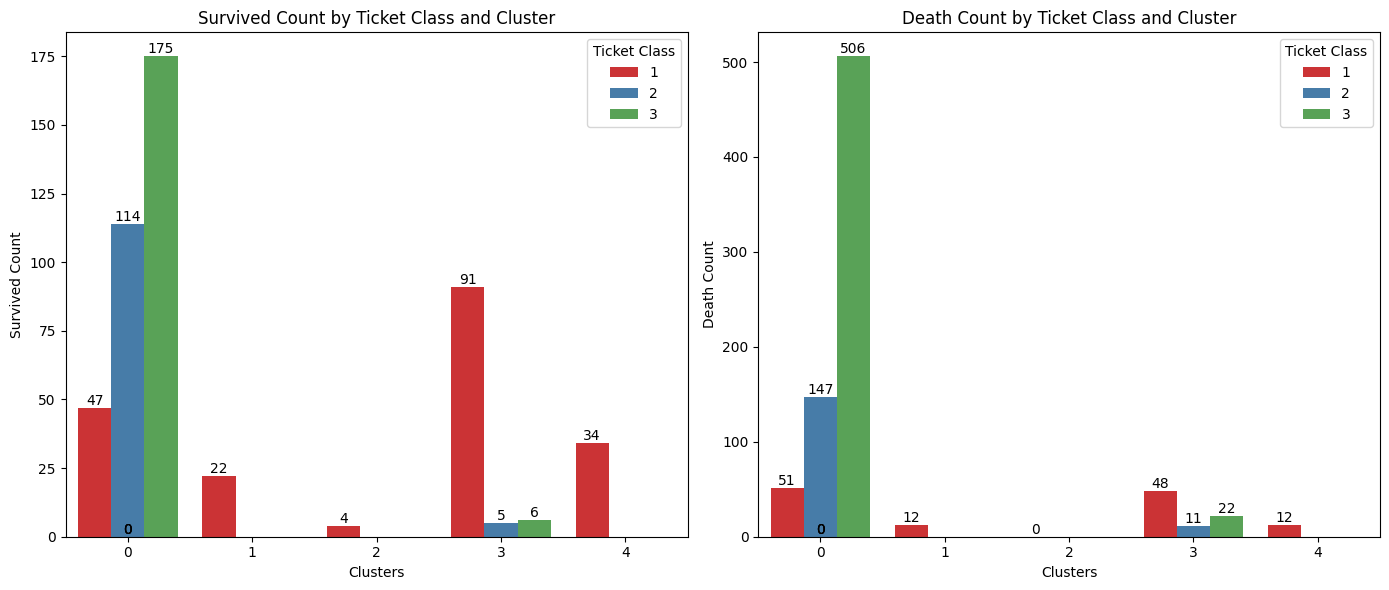

In [ ]:
survival_counts = data_original.groupby(['clusters', 'pclass'])['survived'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='clusters', y=1, hue='pclass', data=survival_counts.reset_index(), palette='Set1')
plt.title('Survived Count by Ticket Class and Cluster')
plt.xlabel('Clusters')
plt.ylabel('Survived Count')
plt.legend(title='Ticket Class', loc='upper right')

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='clusters', y=0, hue='pclass', data=survival_counts.reset_index(), palette='Set1')
plt.title('Death Count by Ticket Class and Cluster')
plt.xlabel('Clusters')
plt.ylabel('Death Count')
plt.legend(title='Ticket Class', loc='upper right')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


* Analysis and Comments


+ Number of deaths: 809 people
+ The number of male deaths is 682 people
+ The number of female deaths is 127 people

+ Number of people buying 1st class tickets: 321 people, death rate: 38.3%
+ Number of people buying 2nd class tickets: 277 people, death rate: 57%
+ Number of people buying 3rd class tickets: 709 people, death rate: 83.3%



+ In Group 0
 - Number of deaths: **704 people**, accounting for nearly 54% of the total number of passengers
 - The number of male deaths is 589 people
 - Passengers mainly buy 2nd and 3rd class tickets (But most are 3rd class)


+ In group 1
 - Small population but there seem to be more women traveling with siblings or children (34 people)
 - 100% of passengers in this group buy tickets in class 1

However:
 - There were **12 people** killed (about 35% of passengers in this group)


+ In group 2
 - Number of deaths: **81 people**, accounting for 10% of the total number of passengers
 - Passengers mainly buy 2nd class tickets
 - Mortality rate is about 44.2%
 - It seems that this group is mainly made up of passengers who are related to siblings

+ In group 3
 - Number of survivors is 100%
 - This is a group of only 4 passengers, all 4 bought 1st class tickets (average price is about more than 500,000 euros)
 - Based on the ticket price, we can see that these are people from a different class
+ In group 4
 - This group seems to be mothers traveling with children or siblings
 - 100% of passengers in this group buy tickets in class 1
 - Number of deaths: **12 people**